In [2]:
import fastai.vision as vs
from fastai.metrics import error_rate

In [3]:
path = vs.untar_data(vs.URLs.CIFAR)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
path

PosixPath('/home/jupyter/.fastai/data/cifar10')

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/cifar10/test'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/labels.txt')]

In [6]:
img_path = path/'train'
label_path=path/'labels.txt'

In [7]:
label_path

PosixPath('/home/jupyter/.fastai/data/cifar10/labels.txt')

In [8]:
# Get image files
files = vs.get_image_files(img_path)
files[:5]

[]

In [9]:
img_path.ls()

[PosixPath('/home/jupyter/.fastai/data/cifar10/train/ship'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/horse'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/frog'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/deer'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/bird'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/cat'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/airplane'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/dog'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/automobile'),
 PosixPath('/home/jupyter/.fastai/data/cifar10/train/truck')]

In [10]:
tfms = vs.get_transforms()
images = vs.ImageDataBunch.from_folder(path,ds_tfms=tfms,size=224,bs=64).normalize(vs.imagenet_stats)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


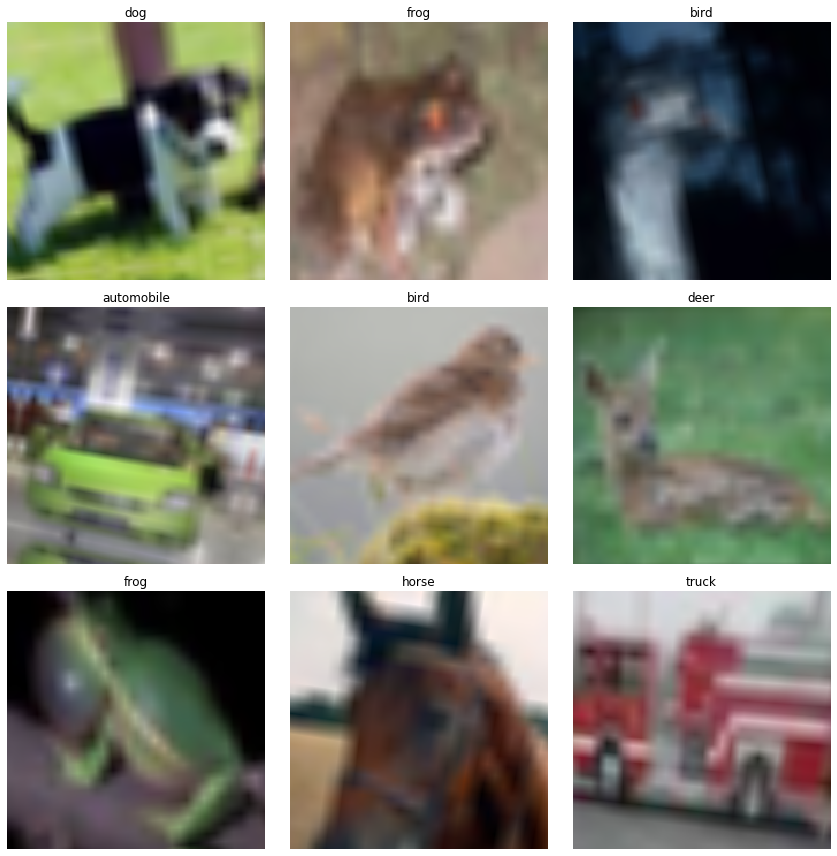

In [11]:
images.show_batch(rows=3,figszie=(5,5))

In [12]:
images.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [18]:
learn_object = vs.cnn_learner(images,base_arch=vs.models.resnet50,metrics=error_rate)

In [ ]:
learn_object.fit_one_cycle(3)

In [15]:
learn_object.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


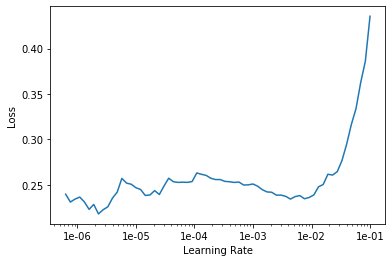

In [16]:
learn_object.recorder.plot()

In [17]:
interpret_object = vs.ClassificationInterpretation.from_learner(learn_object)

IndexError: Caught IndexError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 651, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/vision/data.py", line 270, in get
    fn = super().get(i)
  File "/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py", line 75, in get
    return self.items[i]
IndexError: index 0 is out of bounds for axis 0 with size 0
